<a href="https://colab.research.google.com/github/Abhishek3102/ML/blob/main/K_Nearest_Neighbors_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Euclidean Distance

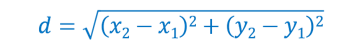

Manhattan Distance

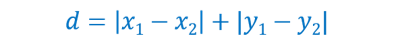

In [ ]:
import numpy as np
import statistics

K Nearest Neighbors

In [ ]:
class KNN_Classifier():

  # Initiating the parameters
  def __init__(self, distance_metric):
    self.get_distance_metric = distance_metric

  # getting the distance metric
  def get_distance_metric(self, training_data_point, test_data_point):

    if(self.get_distance_metric == 'euclidean'):
      distance = 0

      for i in range(len(training_data_point)-1):
        distance += (training_data_point[i] - test_data_point[i])**2

      euclidean_distance = np.sqrt(distance)
      return euclidean_distance

    elif(self.get_distance_metric == 'manhattan'):
      distance = 0

      for i in range(len(training_data_point) -1):
        distance += abs(training_data_point[i] - test_data_point[i])

        manhattan_distance = distance
        return manhattan_distance

  # getting the nearest neighbors
  def nearest_neighbors(self, X_train, test_data, k):

    distance_list = []

    for training_data in X_train:

      distance = self.get_distance_metric(training_data, test_data)
      distance_list.append(training_data, distance)

    distance_list.sort(key = lambda x: x[1])

    neighbors_list = []

    for j in range(k):
      neighbors_list.append(distance_list[j][0])
    return neighbors_list

  # Predict the class of new data point
  def predict(self,X_train, test_data, k):

    neighbors = self.nearest_neighbors(X_train, test_data, k)

    for data in neighbors:
      label = []
      label.append(data[-1])

    predicted_class = statistics.mode(label)
    return predicted_class



Diabetes Prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Separating features and target
X = df.drop(columns="Outcome", axis=1)
Y = df['Outcome']

In [ ]:
# Converting the data to numpy array
X = X.to_numpy()
Y = Y.to_numpy()

In [ ]:
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [ ]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
# startify=Y is used so that there is an even split of 0s and 1s in training as well as test data

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
X_train

array([[0.00e+00, 1.19e+02, 0.00e+00, ..., 3.24e+01, 1.41e-01, 2.40e+01],
       [6.00e+00, 1.05e+02, 7.00e+01, ..., 3.08e+01, 1.22e-01, 3.70e+01],
       [1.00e+00, 1.89e+02, 6.00e+01, ..., 3.01e+01, 3.98e-01, 5.90e+01],
       ...,
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [4.00e+00, 1.12e+02, 7.80e+01, ..., 3.94e+01, 2.36e-01, 3.80e+01],
       [0.00e+00, 8.60e+01, 6.80e+01, ..., 3.58e+01, 2.38e-01, 2.50e+01]])

In [ ]:
X_train = np.insert(X_train, 8, Y_train, axis=1)

In [ ]:
X_train

array([[0.00e+00, 1.19e+02, 0.00e+00, ..., 1.41e-01, 2.40e+01, 1.00e+00],
       [6.00e+00, 1.05e+02, 7.00e+01, ..., 1.22e-01, 3.70e+01, 0.00e+00],
       [1.00e+00, 1.89e+02, 6.00e+01, ..., 3.98e-01, 5.90e+01, 1.00e+00],
       ...,
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.00e-01, 3.50e+01, 0.00e+00],
       [4.00e+00, 1.12e+02, 7.80e+01, ..., 2.36e-01, 3.80e+01, 0.00e+00],
       [0.00e+00, 8.60e+01, 6.80e+01, ..., 2.38e-01, 2.50e+01, 0.00e+00]])

In [ ]:
X_train.shape

(614, 9)

In [ ]:
print(X_train[:,8])

[1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.

**X_train --> training data with features and target**

**X_test --> test data without target**

**Model Training : KNN Classifier**

In [ ]:
classifier = KNN_Classifier(distance_metric='euclidean')

**NOTE : THE KNN CLASSIFIERN can predict the label for only one data at a time**

In [ ]:
prediction = classifier.predict(X_train, X_test[0], k=5)

TypeError: 'str' object is not callable